# Assignment: Trees
Do three questions.

**Q1.** Please answer the following questions in your own words.

1. How are trees constructed?

Decision trees start with the entire dataset and continusouly split the sample to partition the data and minizmie differences in the outcomes within groups. The algorithm is looking for the best feature and threshold to split the data so that the resulting groups are as "pure" as possible.

2. How do trees handle non-linear relationships between variables? Compare this to linear models.

Trees handle non-linear relationships by splitting the data based on thresholds, not assuming any linear form. In contrast, linear models assume a straight-line relationship between input and output, which can miss more complicated patterns in the data.

3. Why is the Gini a good loss function for categorical target variables?

The Gini impurity measures how often a randomly chosen sample would be incorrectly labeled if it was randomly labeled according to the distribution in the node. It’s good for classification because it’s sensitive to how mixed the classes are. Lower Gini means purer nodes, which is what the tree wants as it splits.

4. Why do trees tend to overfit, and how can this tendency be constrained?

Trees can keep splitting until each leaf is nearly pure—sometimes even just one sample per leaf—so they end up memorizing the training data. To constrain this, you can set a minimum number of samples per leaf, limit on the depth of the tree, or impose a lower bound on the impurity that can appear at a leaf.

5. True or false, and explain: Trees only really perform well in situations with lots of categorical variables as features/covariates.

FALSE. Trees can handle both categorical and continuous variables. They perform well in a variety of situations, especially when relationships are complex or non-linear. That said, they’re naturally good at handling categorical features without needing one-hot encoding.

6. Why don't most versions of classification/regression tree concept allow for more than two branches after a split?

Binary splits (two branches) are simpler and allow for a more controlled, greedy search through the data. Having multiple branches per split increases complexity and computation, and often doesn’t improve performance significantly. Binary splits also help keep the tree structure easier to interpret and more consistent.

7. What are some heuristic ways you can examine a tree and decide whether it is probably over- or under-fitting?

Overfitting: very deep tree, lots of small branches, many leaves with only a few samples, very high training accuracy but poor test performance.

underfitting: very shallow tree, few splits, low accuracy on both training and test sets, failing to capture clear patterns in the data.

**Q2.** This is a case study on regression and classification trees.

1. Load `./data/cars_hw.csv`. How many observations and features/covariates/variables? What are the available variables? Take a look at the first few rows of data.


In [1]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ashleynguyen04/trees/refs/heads/main/assignment/data/cars_hw.csv'
df = pd.read_csv(url)
print(df.head())

   Unnamed: 0        Make  Make_Year   Color  Body_Type  Mileage_Run  \
0           1  Volkswagen       2017  silver      sedan        44611   
1           2     Hyundai       2016     red  crossover        20305   
2           3       Honda       2019   white        suv        29540   
3           4     Renault       2017  bronze  hatchback        35680   
4           5     Hyundai       2017  orange  hatchback        25126   

  No_of_Owners  Seating_Capacity Fuel_Type Transmission Transmission_Type  \
0          1st                 5    diesel      7-Speed         Automatic   
1          1st                 5    petrol      5-Speed            Manual   
2          2nd                 5    petrol      5-Speed            Manual   
3          1st                 5    petrol      5-Speed            Manual   
4          1st                 5    petrol      5-Speed            Manual   

    Price  
0  657000  
1  682000  
2  793000  
3  414000  
4  515000  


2. For the categorical variables `Make`, `Color`, `Body_type`, `No_of_Owners`, `Fuel_Type`, `Transmission`, and `Transmission_Type`, create dummy/one-hot-encoded representations. For numeric variables, we'll use `Mileage_Run`, `Make_Year`, and `Seating_Capacity`. Our target variable will be `Price`. Make a train-test split of your data.


In [3]:
from sklearn.model_selection import train_test_split

cat_vars = ["Make", "Color", "Body_Type", "No_of_Owners", "Fuel_Type", "Transmission", "Transmission_Type"]
num_vars = ["Mileage_Run", "Make_Year", "Seating_Capacity"]

df_cat = pd.get_dummies(df[cat_vars])
X = pd.concat([df[num_vars], df_cat], axis=1)
y = df["Price"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=31)


3. From `sklearn.tree`, import the `DecisionTreeRegressor` and `plot_tree`. Use a train-test split to iterate over possible values for `min_samples_leaf`, computing the $R^2$ for each value between 1 and 25. What choice achieves the highest $R^2$ on the test data?


In [8]:
from sklearn.tree import DecisionTreeClassifier # Import the tree classifier
from sklearn.tree import plot_tree # Plot the tree
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error

best_leaf = None
best_r2 = -100000

for leaf_size in range(1, 26):
    model = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=31)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    score = r2_score(y_test, y_pred)
    if score > best_r2:
        best_r2 = score
        best_leaf = leaf_size

print("Highest r^2 choice:", best_leaf)

Highest r^2 choice: 5



4. For the optimal `min_samples_leaf` from 3, regress price on the rest of the features/covariates using the training data. What is your $R^2$ and RMSE on the test set? Plot the dendrogram. Plot the residuals. Is the density of residuals symmetric and centered around 0?


R^2 0.7987664911480151
RMSE: 135476.9397892881


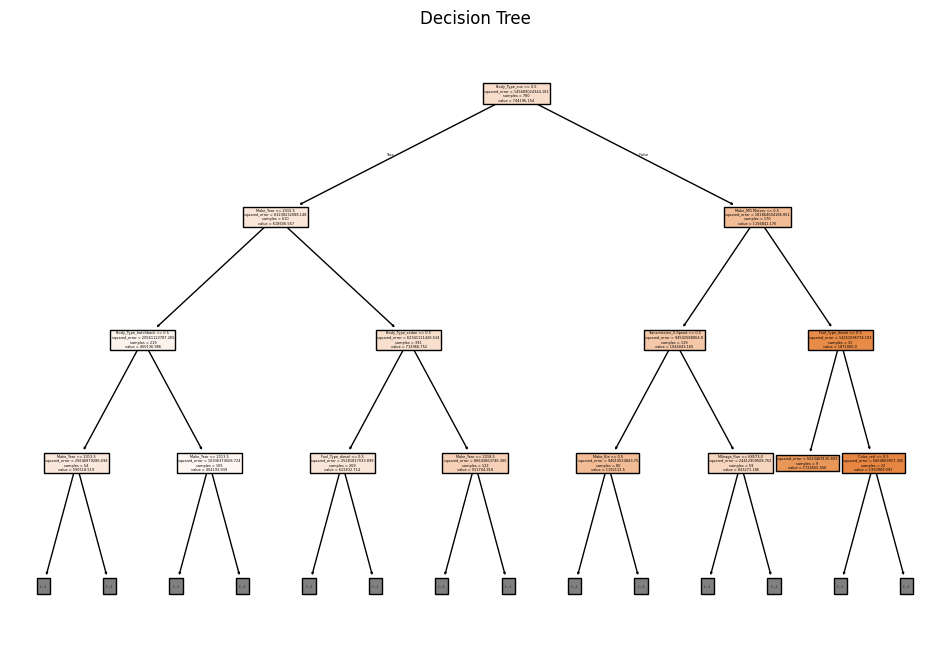

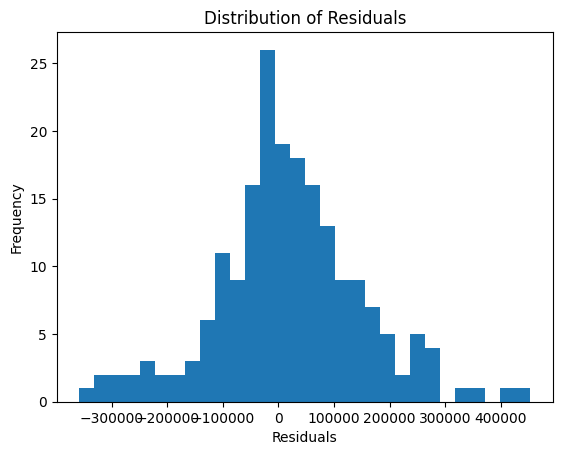

In [10]:
import numpy as np
import matplotlib.pyplot as plt
model = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=31)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print("R^2", r2)
print("RMSE:", rmse)

plt.figure(figsize=(12, 8))
plot_tree(
    model,
    feature_names=X_train.columns,
    filled=True,
    max_depth=3
)
plt.title("Decision Tree")
plt.show()

residuals = y_test - y_pred

plt.figure()
plt.hist(residuals, bins=30)
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.title("Distribution of Residuals")
plt.show()

# Yes, the density of residuals seem to be relatively symmetric and centered around 0.


5. Run a linear regression of price on the same variables. Which model -- regression tree or linear regression -- performs better on the test set? Why?


In [13]:
from sklearn.linear_model import LinearRegression

lin_model = LinearRegression()
lin_model.fit(X_train, y_train)

y_pred_lr = lin_model.predict(X_test)

r2_lr = r2_score(y_test, y_pred_lr)
rmse_lr = np.sqrt(mean_squared_error(y_test, y_pred_lr))

print("LR R^2",  r2_lr)
print("LR RMSE", rmse_lr)

# It seems like the decision tree performed slightly better with a higher R^2
# and lower RMSE. This is because Decision Trees capture non-linear relationships
# much better, which are prominent in this data set.

LR R^2 0.7840319999991563
LR RMSE 140349.1967202828



6. Predict prices using both your tree and your linear model, and make a scatter plot of their values. Describe what you see.

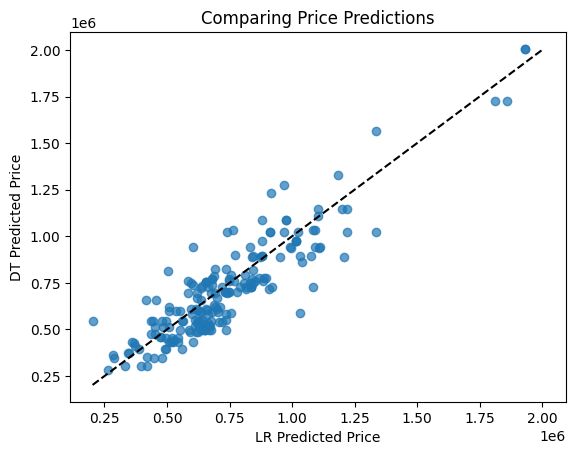

In [15]:
plt.figure()
plt.scatter(y_pred_lr, y_pred, alpha=0.7)
plt.xlabel("LR Predicted Price")
plt.ylabel("DT Predicted Price")
plt.title("Comparing Price Predictions")

# for equality comparison purposes
all_preds = list(y_pred_lr) + list(y_pred)
min_pred, max_pred = min(all_preds), max(all_preds)
plt.plot([min_pred, max_pred], [min_pred, max_pred], 'k--')
plt.show()

# both models seem to be predicting relatively similar values, following the
# diagonal line. It seems that the LR model may be predicting slightly higher
# prices overall when compared to the DT model, as evidenced by a good deal
# of points below the diagonal line.

**Q3.** This is a case study about classification and regression trees.

1. Load the `Breast Cancer METABRIC.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.


In [2]:
import pandas as pd

url = 'https://raw.githubusercontent.com/ashleynguyen04/trees/refs/heads/main/assignment/data/Breast%20Cancer%20METABRIC.csv'
df = pd.read_csv(url)
print(df.head())

  Patient ID  Age at Diagnosis Type of Breast Surgery    Cancer Type  \
0    MB-0000             75.65             Mastectomy  Breast Cancer   
1    MB-0002             43.19      Breast Conserving  Breast Cancer   
2    MB-0005             48.87             Mastectomy  Breast Cancer   
3    MB-0006             47.68             Mastectomy  Breast Cancer   
4    MB-0008             76.97             Mastectomy  Breast Cancer   

                        Cancer Type Detailed Cellularity Chemotherapy  \
0           Breast Invasive Ductal Carcinoma         NaN           No   
1           Breast Invasive Ductal Carcinoma        High           No   
2           Breast Invasive Ductal Carcinoma        High          Yes   
3  Breast Mixed Ductal and Lobular Carcinoma    Moderate          Yes   
4  Breast Mixed Ductal and Lobular Carcinoma        High          Yes   

  Pam50 + Claudin-low subtype  Cohort ER status measured by IHC  ...  \
0                 claudin-low     1.0                   


2.  We'll use a consistent set of feature/explanatory variables. For numeric variables, we'll include `Tumor Size`, `Lymph nodes examined positive`, `Age at Diagnosis`. For categorical variables, we'll include `Tumor Stage`, `Chemotherapy`, and `Cancer Type Detailed`. One-hot-encode the categorical variables and concatenate them with the numeric variables into a feature/covariate matrix, $X$.



In [5]:
df = df.rename(columns={"Lymph nodes examinded positive": "Lymph nodes examined positive"})
num_vars = ["Tumor Size", "Lymph nodes examined positive", "Age at Diagnosis"]
cat_vars = ["Tumor Stage", "Chemotherapy", "Cancer Type Detailed"]

target_col = "Overall Survival Status"
cols_needed = num_vars + cat_vars + [target_col]
df_subset = df[cols_needed]

df_subset = df_subset.dropna(subset=cols_needed)
df_cat = pd.get_dummies(df_subset[cat_vars], drop_first=False)

X = pd.concat([df_subset[num_vars], df_cat], axis=1)
y = df_subset[target_col]

3. Let's predict `Overall Survival Status` given the features/covariates $X$. There are 528 missing values, unfortunately: Either drop those rows from your data or add them as a category to predict. Constrain the minimum samples per leaf to 10. Print a dendrogram of the tree. Print a confusion matrix of the algorithm's performance. What is the accuracy?



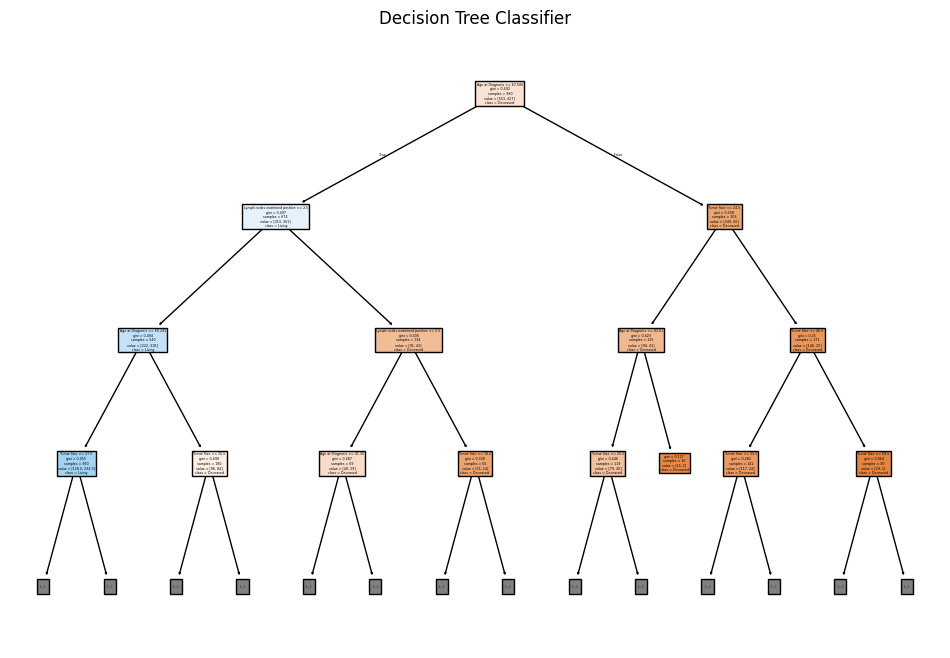

Confusion Matrix:
          Deceased  Living
Deceased       172      65
Living          96      87
Test set accuracy: 0.6166666666666667


In [10]:
from sklearn.metrics import confusion_matrix, accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31, stratify=y)
clf = DecisionTreeClassifier(min_samples_leaf=10, random_state=31)
clf.fit(X_train, y_train)

plt.figure(figsize=(12, 8))
plot_tree(
    clf,
    feature_names=X.columns,
    class_names=clf.classes_,
    filled=True,
    max_depth=3
)
plt.title("Decision Tree Classifier")
plt.show()

y_pred = clf.predict(X_test)
cm = confusion_matrix(y_test, y_pred, labels=clf.classes_)
cm_df = pd.DataFrame(cm, index=clf.classes_, columns=clf.classes_)
print("Confusion Matrix:")
print(cm_df)

accuracy = accuracy_score(y_test, y_pred)
print("Test set accuracy:", accuracy)

4. For your model in part three, compute three statistics:
    - The **true positive rate** or **sensitivity**:
        $$
        TPR = \dfrac{TP}{TP+FN}
        $$
    - The **true negative rate** or **specificity**:
        $$
        TNR = \dfrac{TN}{TN+FP}
        $$
    Does your model tend to perform better with respect to one of these metrics?



In [14]:
labels = ["Deceased", "Living"]

TP = cm[0, 0]
FN = cm[0, 1]
FP = cm[1, 0]
TN = cm[1, 1]

TPR = TP / (TP + FN)
TNR = TN / (TN + FP)

print("true positive rate:", TPR)
print("true negative rate:", TNR)

# tends to perform better at predicting true positives

true positive rate: 0.7257383966244726
true negative rate: 0.47540983606557374


5. Let's predict `Overall Survival (Months)` given the features/covariates $X$. Use the train/test split to pick the optimal `min_samples_leaf` value that gives the highest $R^2$ on the test set (it's about 110). What is the $R^2$? Plot the test values against the predicted values. How do you feel about this model for clinical purposes?

best leaf: 37
r^2 for best leaf: 0.06338983949949972
r^2 final: 0.06338983949949972
rmse final: 72.92397663471152


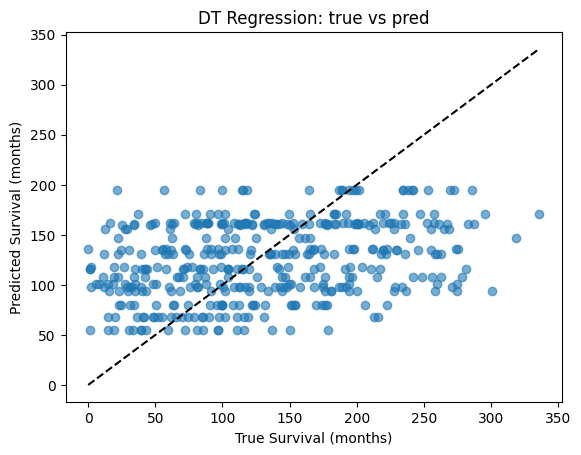

In [26]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import r2_score, mean_squared_error
import numpy as np

target_col = "Overall Survival (Months)"

cols_needed = num_vars + cat_vars + [target_col]
df_small = df[cols_needed].dropna(subset=cols_needed)

df_cat = pd.get_dummies(df_small[cat_vars], drop_first=False)
X = pd.concat([df_small[num_vars], df_cat], axis=1)
y = df_small[target_col]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=31)

best_leaf = None
best_r2 = -1000000

leaf_values = range(1, 126)
r2_scores = []

for leaf_size in leaf_values:
    reg = DecisionTreeRegressor(min_samples_leaf=leaf_size, random_state=31)
    reg.fit(X_train, y_train)
    y_pred = reg.predict(X_test)
    score = r2_score(y_test, y_pred)
    r2_scores.append(score)

    if score > best_r2:
        best_r2 = score
        best_leaf = leaf_size

print("best leaf:", best_leaf)
print("r^2 for best leaf:", best_r2)

final_reg = DecisionTreeRegressor(min_samples_leaf=best_leaf, random_state=31)
final_reg.fit(X_train, y_train)
y_pred_test = final_reg.predict(X_test)
r2_final = r2_score(y_test, y_pred_test)
rmse_final = np.sqrt(mean_squared_error(y_test, y_pred_test))

print("r^2 final:", r2_final)
print("rmse final:", rmse_final)

plt.figure()
plt.scatter(y_test, y_pred_test, alpha=0.6)
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--')
plt.xlabel("True Survival (months)")
plt.ylabel("Predicted Survival (months)")
plt.title("DT Regression: true vs pred")
plt.show()

# The model does not seem to work super well especially in a medical context
# where precision is paramount - it may possibly slightly overestimate survival
# times but generally not necessarily maintaining a linear relationship as the
# trend seems more constant.

**Q4.** This is a case study about trees using bond rating data. This is a dataset about bond ratings for different companies, alongside a bunch of business statistics and other data. Companies often have multiple reviews at different dates. We want to predict the bond rating (AAA, AA, A, BBB, BB, B, ..., C, D). Do business fundamentals predict the company's rating?

1. Load the `./data/corporate_ratings.csv` dataset. How many observations and variables does it contain? Print out the first few rows of data.

2.  Plot a histogram of the `ratings` variable. It turns out that the gradations of AAA/AA/A and BBB/BB/B and so on make it hard to get good results with trees. Collapse all AAA/AA/A ratings into just A, and similarly for B and C.

3. Use all of the variables **except** Rating, Date, Name, Symbol, and Rating Agency Name. To include Sector, make a dummy/one-hot-encoded representation and include it in your features/covariates. Collect the relevant variables into a data matrix $X$.

4. Do a train/test split of the data and use a decision tree classifier to predict the bond rating. Including a min_samples_leaf constraint can raise the accuracy and speed up computation time. Print a confusion matrix and the accuracy of your model. How well do you predict the different bond ratings?

5. If you include the rating agency as a feature/covariate/predictor variable, do the results change? How do you interpret this?

**Q5.** This is a case study about detecting fraud using classification trees. The goal is to predict the `class` variable, which is 0 for non-fraud and 1 for fraud.

1. Open `./data/creditcard_fraud.csv`. Print the number of observations and variables, and look at the first few rows of data. The variables are already normalized and de-identified, and are just called things like `V8` to protect the privacy of the clients.

2. Print a table of counts for the `class` variable and make a histogram. What percentage of transactions are fraudulent?

3. Drop `Time` and make a decision tree classifier to predict fraud. Print a confusion table and compute the accuracy. This is a serious **class imbalance** problem: The minority class is so small that essentially predicting 0's for all cases will achieve an extremely high accuracy. There are over-sampling techniques to deal with this issue, but we don't have time to cover them in class.

4. Imagine that you block every transaction in the test set labelled as fraudulent. How much money is (1) saved that should be saved, (2) lost to fraud anyway, (3) withheld in error from customers? Does implementing this anti-fraud system seem like a good idea, or not? Why?

5. Instead of predicting fraud, predict loss: Multiple the `Class` variable times the `Amount` variable, and call it `Loss`. Predict it using a decision tree regressor (making sure to drop Class, Time, and Loss from the features/covariates/predictors). What $R^2$ and RMSE do you get? Make a scatterplot of the predicted values on the test group versus the actual test values. Do you notice any interesting patterns? How could you use this algorithm to decide which transactions to block, and why?


**Q6.** Show that any decision tree is equivalent to a linear regression on a set of dummy variables that represent the optimal splits in the tree.

Hint: You can think of CART as partitioning the feature space into a set of sets $\{S_1, S_2, ..., S_K\}$, and then predicting the average for all of the observations in each set $S_k$, $m_k$:
$$
\hat{y}(x) = \sum_{k=1}^K \mathbb{I}\{ x \text{ is in } S_k \} m_k
$$
where $\mathbb{I} \{ P(x,k)\}$ takes the value 1 if the proposition $P(x,k)$ is true and 0 otherwise. Now, doesn't that look like least-squares regression on a set of dummy/one-hot-encoded variables?

Conversely, can any linear regression be represented by a tree?